<a href="https://colab.research.google.com/github/zhudarius/SYNCSHACK19/blob/preprocessing/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 05

# Exercise

In this exercise, you are required to make word cloud generator. The implemented code should be able to activate/deactivate preprocessing techniques by settings. The final output of your code should display the word cloud of preprocessed (only selected techniques) data. You need to implement the following techniques:

*   Removing punctuation
*   Decapitalise
*   Removing stopwords

**When you generate word cloud, YOU MUST use  [generate_from_frequencies()](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud.generate_from_frequencies). **

In [0]:
!pip install wikipedia

In [0]:
# # You should submit "ipynb" file (You can download it from "File" > "Download .ipynb") to Canvas
# # Please include the required libraries

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import wikipedia
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as sw

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

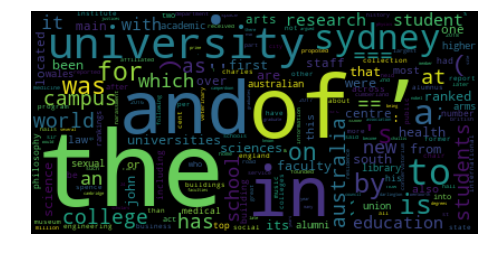

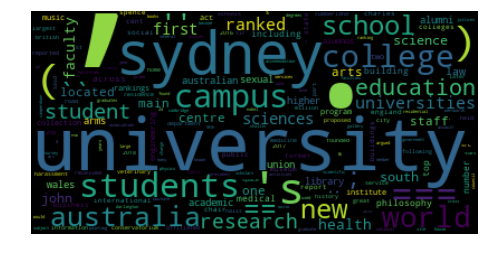

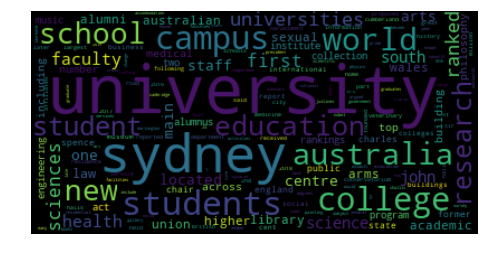

In [0]:
class WikiWordCloud:
    
    _word = ""
    text = ""
    tokens = []
    
    
    def __init__(self, word):
        self._word = word
    
    # preprocessing the contents of wiki page of the _word, pre
    def preprocess(self, punctuations=False, decapitalisation=False, stopwords=False):
      
      self.tokens = word_tokenize(self.text)

      if punctuations:
        self.tokens = [re.sub(r'[^\w\s]', '', w) for w in self.tokens]
      
      if decapitalisation:
        self.tokens = [w.lower() for w in self.tokens]
      
      if stopwords:
        self.tokens = [w for w in self.tokens if not w in sw.words()]


    # getting the contents of wiki page
    def get_wiki_contents(self):
      self.text = wikipedia.page(self._word).content
        
    # displaying word cloud
    def display_cloud(self):
      
      freq = {}
      
      for word in self.tokens:
        if word in freq:
          freq[word] = freq[word] + 1
        else:
          freq[word] = 0
      
      
      wordcloud = WordCloud().generate_from_frequencies(freq)
      
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.axis("off")
      plt.show()
    
    
    
word = "University of Sydney"
wwc = WikiWordCloud(word)

wwc.get_wiki_contents()


wwc.preprocess(punctuations=False, decapitalisation=True, stopwords=False)
wwc.display_cloud()


wwc.preprocess(punctuations=False, decapitalisation=True, stopwords=True)
wwc.display_cloud()


wwc.preprocess(punctuations=True, decapitalisation=True, stopwords=True)
wwc.display_cloud()
